In [1]:
import numpy as np
from matplotlib import pyplot as plt

# 1

## (a)

In [ ]:
w_star = np.random.normal(loc=0.,
                          scale=1.,
                          size=(1,100))
X = np.random.normal(loc=0.,
                     scale=1.,
                     size=(100,10))
y = w_star @ X

In [ ]:
w_hat = y @ np.linalg.pinv(X)

## (b)

In [ ]:
mse = lambda param, opt=w_star : np.sum((param - opt) ** 2) / param.shape[1]

In [ ]:
mse(w_hat)

0.8104907523901993

## (c)

In [ ]:
n_list = (1, 10, 20, 30, 40, 50, 60, 70, 80, 90)

In [ ]:
def get_mse(d=100, n_list=(1, 10, 20, 30, 40, 50, 60, 70, 80, 90)):
    w_star = np.random.normal(loc=0.,
                              scale=1.,
                              size=(1,d))
    mse_list = []
    for n in n_list:
        X = np.random.normal(loc=0.,
                             scale=1.,
                             size=(d,n))
        y = w_star @ X
        w_hat = y @ np.linalg.pinv(X)
        loss = mse(w_hat, w_star)
        mse_list.append(loss)
        print('n:', n, 'mse:', loss)
    return np.array(mse_list)

In [ ]:
mse_list = get_mse()

n: 1 mse: 0.9446118027550847
n: 10 mse: 0.8886321676577303
n: 20 mse: 0.8227406829623236
n: 30 mse: 0.7331249949125218
n: 40 mse: 0.5871420654494865
n: 50 mse: 0.45594917432420273
n: 60 mse: 0.3984885070349805
n: 70 mse: 0.3259747023698487
n: 80 mse: 0.22595326288898476
n: 90 mse: 0.039911453144818976


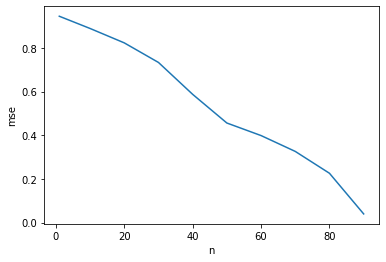

In [ ]:
plt.plot(n_list, mse_list)
plt.xlabel('n')
plt.ylabel('mse')
plt.show()

## (d) and (e)

In [ ]:
def compare_mse(num_seed=30, d=100, n_list=(1, 10, 20, 30, 40, 50, 60, 70, 80, 90)):
    mse_list, f_list = [], []
    w_star = np.random.normal(loc=0.,
                              scale=1.,
                              size=(1,d))
    for n in n_list:
        loss = 0.
        for i in range(num_seed):
            np.random.seed(i)

            X = np.random.normal(loc=0.,
                                 scale=1.,
                                 size=(d,n))
            y = w_star @ X
            w_hat = y @ np.linalg.pinv(X)
            loss += mse(w_hat, w_star)

        mse_list.append(loss / num_seed)
        f_list.append(np.sum(w_star ** 2) * (1. - n / 100.))

    return np.array(mse_list), np.array(f_list)

$f := \| w^* \|_2^2 \left( 1 - \frac{n}{100} \right)$ seems to be $\| w^* - w \|_2^2$ scaled by $100$.

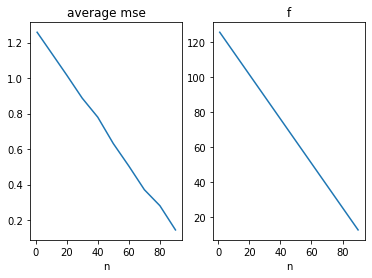

In [ ]:
mse_list, f_list = compare_mse()

plt.subplot(1, 2, 1)
plt.plot(n_list, mse_list)
plt.title('average mse')
plt.xlabel('n')

plt.subplot(1, 2, 2)
plt.plot(n_list, f_list)
plt.title('f')
plt.xlabel('n')

plt.show()

# 5

In [2]:
n   = 11
n_t = 1000

X = np.sort(np.concatenate((np.random.uniform(low=-1.,
                                             high=1.,
                                             size=n-2),
                            np.array([-1., 1.]))))
X_t = np.sort(np.random.uniform(low=-1.,
                                high=1.,
                                size=n_t))
f = lambda X : np.square(X) + X + 1

y   = f(X)
y_t = f(X_t)

L = (.01, .05, 1, 10, 100)

Given a kernel $K(x, \tilde{x})$,<br>
the predictor is
$$
\hat{y} = \underbrace{\boldsymbol{y} \hat{\mathbf{K}}^{-1}}_\boldsymbol{\alpha} \hat{\mathbf{K}}(\boldsymbol{x}, x)
$$

In [10]:
def predict(ker, L,
            X_test=X_t,
            X_train=X, y_train=y):
    X_expand   = np.broadcast_to(X[:, None]  , (n,n))
    X_t_expand = np.broadcast_to(X_t[None, :], (n,n_t))

    K_hat = ker(X_expand,
                X_expand.T, L)
    alpha = np.linalg.solve(K_hat, y)
    K_hat_x = ker(np.broadcast_to(X[:, None],
                                  shape=(n,n_t)),
                  X_t_expand, L)
    return np.sum(np.broadcast_to(alpha[:, None],
                                  shape=(n,n_t)) * K_hat_x,
                  axis=0)

## (a)

In [6]:
g_ker = lambda x, x_tilde, L : np.exp(-L * np.square(x - x_tilde))

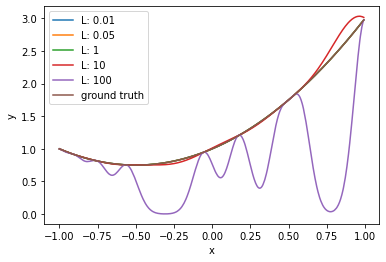

In [11]:
for bw in L:
    y_pred = predict(g_ker, bw)
    plt.plot(X_t, y_pred, label='L: '+str(bw))

plt.plot(X_t, y_t, label='ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## (b)

In [12]:
lap_ker = lambda x, x_tilde, L : np.exp(-L * np.abs(x - x_tilde))

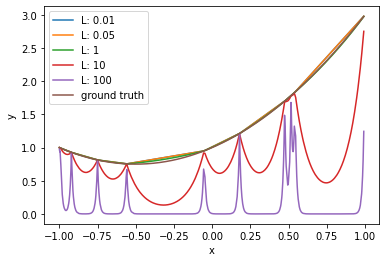

In [13]:
for bw in L:
    y_pred = predict(lap_ker, bw)
    plt.plot(X_t, y_pred, label='L: '+str(bw))

plt.plot(X_t, y_t, label='ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 6

[`scikit-learn-extra`](https://scikit-learn-extra.readthedocs.io), which runs on CPUs, is not installed in Colab by default.

In [ ]:
!pip install scikit-learn-extra

import sklearn_extra.kernel_methods as kernel
import sklearn.svm as svm

from time import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 29.8 MB/s 


Fix the random seed so that experiments are reproducible.

In [ ]:
seed = 88
np.random.seed(seed)

In [ ]:
d = int(1e2)
n = int(2e4)
n_t = int(1e3)

X = np.random.normal(loc=0.,
                     scale=1.,
                     size=(n,d))
X_t = np.random.normal(loc=0.,
                       scale=1.,
                       size=(n_t,d))

In [ ]:
f = lambda X : np.sum(np.tanh(X), axis=1)

In [ ]:
y   = f(X)
y_t = f(X_t)

## (a)

In [ ]:
ep_rgs = kernel.EigenProRegressor(n_epoch=10,
                                  kernel='rbf')
start = time()
ep_rgs.fit(X, y)
end = time()

y_hat = ep_rgs.predict(X)
y_t_hat = ep_rgs.predict(X_t)

print('training mse:', np.mean(np.square(y   - y_hat)))
print('test     mse:', np.mean(np.square(y_t - y_t_hat)))
print('training time:', end - start)

training mse: 0.00749089424058281
test     mse: 3.2909797906832723
training time: 108.68102192878723


## (b)

In [ ]:
svr_rgs = svm.SVR(kernel='rbf',
                  C=1e4)
start = time()
svr_rgs.fit(X, y)
end = time()

y_hat = svr_rgs.predict(X)
y_t_hat = svr_rgs.predict(X_t)

print('training mse:', np.mean(np.square(y   - y_hat)))
print('test     mse:', np.mean(np.square(y_t - y_t_hat)))
print('training time:', end - start)

training mse: 0.009732387131778776
test     mse: 3.2928875900823376
training time: 575.6495513916016


## (c)

In [ ]:
def print_log(log):
    print('\ttraining mse\ttest mse\ttraining time')
    for gamma in log:
        print(str(gamma) + '\t' + '\t'.join(map(lambda x : str(x),
                                                list(log[gamma].values()))))

In [ ]:
log = {}
for gamma in {1./200., 1., 10.}:
    stat = {}

    ep_rgs = kernel.EigenProRegressor(n_epoch=10,
                                      kernel='laplace')
    start = time()
    ep_rgs.fit(X, y)
    end = time()

    y_hat = ep_rgs.predict(X)
    y_t_hat = ep_rgs.predict(X_t)

    stat['training mse'] = np.mean(np.square(y   - y_hat))
    stat['test     mse'] = np.mean(np.square(y_t - y_t_hat))
    stat['training time'] = end - start
    log[gamma] = stat

In [ ]:
print_log(log)

	training mse	test mse	training time
1.0	1.7755498931819382e-07	2.8499781683611154	128.35050702095032
10.0	2.038274518545866e-07	2.8500319707307566	140.7996129989624
0.005	1.8699380060293084e-07	2.850003650873181	130.754141330719


# 7

`EigenPro` for `PyTorch` is implemented [here](https://github.com/EigenPro/EigenPro-pytorch).

Clone the repository the Google Drive, and import files from Drive ([reference](https://blog.csdn.net/OldDriver1995/article/details/108859700)).

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/MIT 6.S088'
# clone repository to drive
!git clone https://github.com/EigenPro/EigenPro-pytorch.git lib
# specify path
dir = '/content/drive/MyDrive/MIT 6.S088/lib'
# add path to system
# reference: https://stackoverflow.com/questions/48905127/importing-py-files-in-google-colab
import sys
sys.path.append(dir)

In [ ]:
import torch, torchvision
import torchvision.transforms as transforms

import eigenpro, kernel

Follow the configuration below to use GPU runtime on Colab

$$
\verb|Runtime| \longrightarrow \verb|Change runtime type| \longrightarrow \verb|Hardware accelerator: GPU| \longrightarrow \verb|Save|
$$

In [ ]:
device = torch.device('cuda' if   torch.cuda.is_available()
                             else 'cpu')

In [ ]:
training_set = torchvision.datasets.CIFAR10(root='./cifar',
                                            train=True,
                                            download=True,
                                            transform=transforms.ToTensor())
test_set = torchvision.datasets.CIFAR10(root='./cifar',
                                        train=False,
                                        download=True,
                                        transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


There are respectively $50,000$ and $10,000$ images of dimension $3 \times 32 \times 32$ in the training set and test set of [CIFAR10](http://www.cs.toronto.edu/~kriz/cifar.html).

In [ ]:
X_train = torch.empty(size=(int(5e4),3,32,32),
                      dtype=torch.float32)
y_train = torch.zeros(size=(int(5e4),10),
                      dtype=torch.float32)
for i in range(len(training_set)):
    X_train[i] = training_set[i][0]
    y_train[i][training_set[i][1]] = 1. # Labels are initially not one-hot encoded.

In [ ]:
X_test  = torch.empty(size=(int(1e4),3,32,32),
                      dtype=torch.float32)

y_test  = torch.zeros(size=(int(1e4),10),
                      dtype=torch.float32)
for i in range(len(test_set)):
    X_test[i] = test_set[i][0]
    y_test[i][test_set[i][1]] = 1. # Labels are initially not one-hot encoded.

## (a)

`y_train` and `y_test` **must** be NumPy arrays instead of PyTorch tensors.

In [ ]:
X_train = torch.reshape(X_train,
                        shape=(int(5e4),-1)).to(device)
X_test = torch.reshape(X_test,
                       shape=(int(1e4),-1)).to(device)
y_train, y_test = y_train.numpy(), y_test.numpy()

Test accuracy is $1 - \verb|val error| = 55.4\%$, but the bandwidth set to $5.0$, which may be too large.

In [ ]:
num_class = 10

ker_func = lambda x, y : kernel.laplacian(x, y, bandwidth=5.)
classifier = eigenpro.FKR_EigenPro(kernel_fn=ker_func,
                                   centers=X_train,
                                   y_dim=num_class,
                                   device=device)
start = time()
log = classifier.fit(X_train, y_train,
                     X_test,  y_test,
                     epochs=[1],
                     mem_gb=12)
end = time()

print('time:', end - start)

SVD time: 1.80, top_q: 999, top_eigval: 0.04, new top_eigval: 5.49e-04
n_subsamples=2000, bs_gpu=2000, eta=1821.49, bs=1627, top_eigval=3.80e-02, beta=0.89
train error: 0.70%	val error: 44.60% (1 epochs, 4.71 seconds)	train l2: 9.94e-03	val l2: 6.36e-02
time: 8.157418727874756
